# 100.Boston House Price Regression

### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 종속변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 독립변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)  

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
boston = load_boston()
df_boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X = boston.data
y = boston.target

In [4]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [8]:
model = Sequential()

model.add(Dense(64, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

epoch 수와 batchz_size 변경하며 test

In [29]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), verbose=1)

Train on 379 samples, validate on 127 samples
Epoch 1/5
379/379 [==============================] - 0s 211us/sample - loss: 8.9008 - mae: 2.0802 - mse: 8.9008 - val_loss: 8.2485 - val_mae: 2.0228 - val_mse: 8.2485
Epoch 2/5
379/379 [==============================] - 0s 206us/sample - loss: 8.7863 - mae: 2.0636 - mse: 8.7863 - val_loss: 8.4611 - val_mae: 2.0284 - val_mse: 8.4611
Epoch 3/5
379/379 [==============================] - 0s 206us/sample - loss: 8.7183 - mae: 2.0440 - mse: 8.7183 - val_loss: 8.8901 - val_mae: 2.0525 - val_mse: 8.8901
Epoch 4/5
379/379 [==============================] - 0s 195us/sample - loss: 8.8146 - mae: 2.0514 - mse: 8.8146 - val_loss: 8.2381 - val_mae: 2.0195 - val_mse: 8.2381
Epoch 5/5
379/379 [==============================] - 0s 169us/sample - loss: 8.7074 - mae: 2.0514 - mse: 8.7074 - val_loss: 8.2015 - val_mae: 2.0040 - val_mse: 8.2015


In [30]:
model.evaluate(X_test, y_test, verbose=0)

[8.201463751905546, 2.0040097, 8.201463]

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

8.201463476911298
0.8886062606599112


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

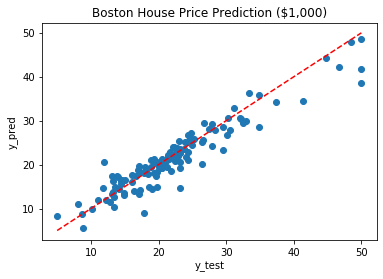

In [33]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

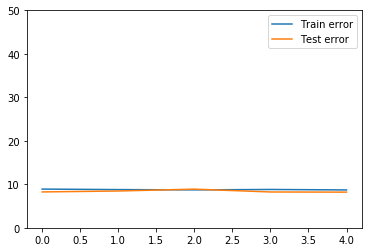

In [34]:
plt.plot(history.history['mse'], label='Train error')
plt.plot(history.history['val_mse'], label='Test error')
plt.ylim([0, 50])
plt.legend()

## sklearn LinearRegression 비교

In [35]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [36]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred = regr.predict(X_test)

In [38]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ -9.17763837   5.1017426    1.74812926   2.82026969  -7.62046073
  20.03233904   1.03040482 -14.81706029   5.99193742  -5.07751023
  -9.13728095   4.30316225 -19.86059204]
Intercept: 
 25.639799558258552


In [39]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("Variance score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 20.52
Variance score: 0.61


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

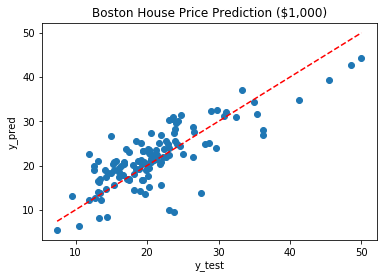

In [40]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 Regression 예측 model 작성

auto-mpg.data - data file  
auto-mpg.names - data 설명 file

1. mpg:           continuous  
2. cylinders:     multi-valued discrete  
3. displacement:  continuous (배기량)   
4. horsepower:    continuous  
5. weight:        continuous  
6. acceleration:  continuous  
7. model year:    multi-valued discrete  
8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [24]:
data_path = keras.utils.get_file("auto-mpg.data", 
                                 "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Regression Model Build

### train

### predict

### $r^2$ 계산